# NLTK BOOK CHAPTER 3

In [70]:
## Python 3

## Section 3.1

In [170]:
import nltk, re, pprint
from urllib.request import urlopen
import matplotlib.pyplot as plt

### Parse TXT from the web

In [201]:
url = "https://www.gutenberg.org/files/2554/2554-0.txt"
crime_and_punishment = urlopen(url).read().decode("utf-8")
tokens = nltk.word_tokenize(crime_and_punishment)
tokens = list(filter(lambda t: t.isalpha(), tokens))
tokens[:10]

['Project',
 'Gutenberg',
 'EBook',
 'of',
 'Crime',
 'and',
 'Punishment',
 'by',
 'Fyodor',
 'Dostoevsky']

In [202]:
text = nltk.Text(tokens)
text.collocations()

Katerina Ivanovna; Pyotr Petrovitch; Pulcheria Alexandrovna; Avdotya
Romanovna; Rodion Romanovitch; Marfa Petrovna; Sofya Semyonovna; old
woman; Porfiry Petrovitch; Amalia Ivanovna; great deal; Nikodim
Fomitch; young man; Ilya Petrovitch; Project Gutenberg; Andrey
Semyonovitch; Hay Market; Dmitri Prokofitch; Good heavens; police
station


The find function starts from index 0, and finds the start index (a character) of the first time a given string appears in the text.

In [203]:
part1_index = crime_and_punishment.find("PART I")

In [204]:
crime_and_punishment[part1_index:part1_index+20]

'PART I\r\n\r\n\r\n\r\nCHAPTE'

The rfind function starts from the last index, and finds the start index (a character) of the last time a given string appears in the text.

In [124]:
end_index = crime_and_punishment.rfind("End")

In [125]:
crime_and_punishment[end_index:end_index+20]

'End of Project Guten'

### Parsing HTML

In [129]:
from bs4 import BeautifulSoup

In [130]:
url = "http://news.bbc.co.uk/2/hi/health/2284783.stm"
html_doc = urlopen(url).read().decode("utf-8")
html_doc[:60]

'<!doctype html public "-//W3C//DTD HTML 4.0 Transitional//EN'

In [131]:
soup = BeautifulSoup(html_doc, 'html.parser')
raw_text = soup.get_text()
tokens = nltk.word_tokenize(raw_text)
txt = nltk.Text(tokens)
txt.concordance('gene')

Displaying 7 of 7 matches:
hey say too few people now carry the gene for blondes to last beyond the next 
blonde hair is caused by a recessive gene . In order for a child to have blond
 have blonde hair , it must have the gene on both sides of the family in the g
ere is a disadvantage of having that gene or by chance . They do n't disappear
des would disappear is if having the gene was a disadvantage and I do not thin
er's Polio campaign launched in Iraq Gene defect explains high blood pressure 
er's Polio campaign launched in Iraq Gene defect explains high blood pressure 


In [132]:
# Build a vocabulary, exclude non-letters (only alphanumeric)
words = [w.lower() for w in tokens if w.isalpha()]
vocab = sorted(set(words))

In [133]:
len(vocab)

254

### Section 3.3

#### Phone keypad exercise

In [142]:
import re

In [143]:
wordlist = [w for w in nltk.corpus.words.words('en') if w.islower()]

In [152]:
keypad = dict()
keypad["2"] = "[abc]"
keypad["3"] = "[def]"
keypad["4"] = "[ghi]"
keypad["5"] = "[jkl]"
keypad["6"] = "[mno]"
keypad["7"] = "[pqrs]"
keypad["8"] = "[tuv]"
keypad["9"] = "[wxyz]"

In [159]:
# Strokes for the word "mortgage"
strokes = "66784243"
pattern = "^" + "".join([keypad[key] for key in strokes]) + "$"

In [160]:
[w for w in wordlist if re.search(pattern, w)]

['mortgage']

In [147]:
[w for w in wordlist if re.search('^j..t$', w)]

['jert', 'jest', 'jilt', 'jolt', 'junt', 'just']

### Section 3.5 - Applications of Regex

In [165]:
word = 'supercalifragilisticexpialidocious'
re.findall(r'(al)', word)

['al', 'al']

In [166]:
wsj = sorted(set(nltk.corpus.treebank.words()))

In [167]:
# Find word with two or vowels
fd = nltk.FreqDist(
    vs for word in wsj
    for vs in re.findall(r'[aeiou]{2,}', word)
)

<Figure size 1080x360 with 0 Axes>

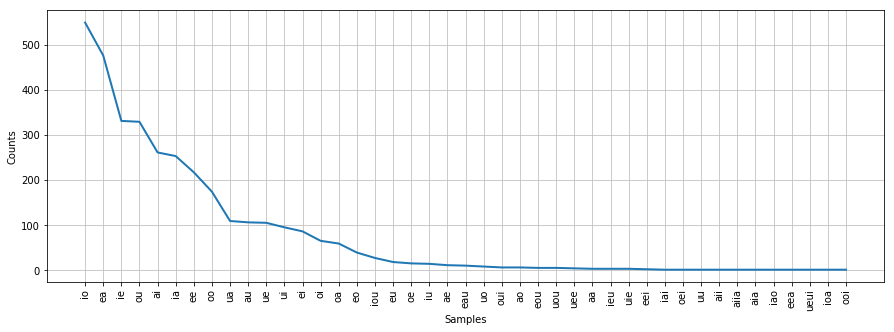

In [174]:
plt.figure(figsize=(15,5))
fd.plot()

Date to numbers

In [183]:
[int(n) for n in re.findall(r'[0-9]+', '2009-12-31')]

[2009, 12, 31]

Primitive stemming

In [192]:
re.findall(r'^(.*)(ing|ly|ed|ious|ies|ive|ment|es)$', 'processes')

[('process', 'es')]

In [193]:
from nltk.corpus import brown
hobbies_learned = nltk.Text(brown.words(categories=['hobbies', 'learned']))

In [194]:
hobbies_learned.findall(r"<\w*> <and> <other> <\w*s>")

speed and other activities; water and other liquids; tomb and other
landmarks; Statues and other monuments; pearls and other jewels;
charts and other items; roads and other features; figures and other
objects; military and other areas; demands and other factors;
abstracts and other compilations; iron and other metals


### 3.6   Normalizing Text

In [213]:
raw = """DENNIS: Listen, strange women lying in ponds distributing swords \
is no basis for a system of government.  Supreme executive power derives from \
a mandate from the masses, not from some farcical aquatic ceremony."""
tokens = nltk.word_tokenize(raw)

In [211]:
porter = nltk.PorterStemmer()

In [216]:
[porter.stem(t) for t in tokens];

In [223]:
wnl = nltk.WordNetLemmatizer()
[wnl.lemmatize(t) for t in tokens];

In [231]:
raw = """'When I'M a Duchess,' she said to herself, (not in a very hopeful tone \
... though), 'I won't have any pepper in my kitchen AT ALL. Soup does very \
... well without--Maybe it's always pepper that makes people hot-tempered,'..."""


In [232]:
raw

"'When I'M a Duchess,' she said to herself, (not in a very hopeful tone though), 'I won't have any pepper in my kitchen AT ALL. Soup does very well without--Maybe it's always pepper that makes people hot-tempered,'..."

In [235]:
re.split(r'[ \t\n]+', raw);

In [239]:
text = 'That U.S.A. poster-print costs $12.40...'
pattern = r'''(?x)\
...     ([A-Z]\.)+\
...   | \w+(-\w+)*\
...   | \$?\d+(\.\d+)?%?\
...   | \.\.\. \
...   | [][.,;"'?():-_`]\
... '''

In [240]:
nltk.regexp_tokenize(text, pattern)

[('', '', ''), ('', '', ''), ('', '-print', ''), ('', '', ''), ('', '', '')]

In [238]:
pattern

'(?x)    # set flag to allow verbose regexps\n...     ([A-Z]\\.)+        # abbreviations, e.g. U.S.A.\n...   | \\w+(-\\w+)*        # words with optional internal hyphens\n...   | \\$?\\d+(\\.\\d+)?%?  # currency and percentages, e.g. $12.40, 82%\n...   | \\.\\.\\.            # ellipsis\n...   | [][.,;"\'?():-_`]  # these are separate tokens\n... '